# Python Stock Trading Quick Start with Alpaca
#### by Billy Hau

The purpose of this tutorial is to provide a quick start guide to trade stock with python. We will use the Alpaca trading platform since it is free and support paper trading. We will go over the fundamental operations, such as connecting to an account, check account asset, quote stock price and placing an order. We will also program a simple trading bot as an exercise.  

## Setup Python Data Science Library

We are going to import the commonly used Data Science libraries here: Pandas, Numpy and Matplotlib. They should come pre-installed with Anaconda, but if not, here's how to install them from pip.  

In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time

In [3]:
! pip install alpaca-trade-api

#### 3) Enter API Credentials from https://app.alpaca.markets/paper/dashboard/overview

In [4]:
ALPACA_ENDPOINT = 'https://paper-api.alpaca.markets'
ALPACA_API = 'API Key ID' # Replace with API Key ID from Alpaca Paper Account
ALPACA_API_SECRET = 'Secret Key' # Replace with Secret Key from Alpaca Paper Account

#### 4) Import Alpaca API and Connect to Account

In [5]:
import alpaca_trade_api

In [6]:
alpaca = alpaca_trade_api.REST(ALPACA_API, ALPACA_API_SECRET, ALPACA_ENDPOINT)

## 1) Access Account Information

In [7]:
account = alpaca.get_account()
print(account)

Account({   'account_blocked': False,
    'account_number': 'PA2QIYXZJEXP',
    'buying_power': '111133.208',
    'cash': '20090.75',
    'created_at': '2020-12-17T08:28:12.995558Z',
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '111133.208',
    'equity': '31366.31',
    'id': 'a9214812-7bb8-48fb-8a25-12f2210334db',
    'initial_margin': '5637.78',
    'last_equity': '31080.11',
    'last_maintenance_margin': '3296.808',
    'long_market_value': '11275.56',
    'maintenance_margin': '3382.668',
    'multiplier': '4',
    'pattern_day_trader': False,
    'portfolio_value': '31366.31',
    'regt_buying_power': '51457.06',
    'short_market_value': '0',
    'shorting_enabled': False,
    'sma': '0',
    'status': 'ACTIVE',
    'trade_suspended_by_user': False,
    'trading_blocked': False,
    'transfers_blocked': False})


##### Account Number

In [8]:
account.account_number

'PA2QIYXZJEXP'

##### Account Cash

In [9]:
account.cash

'20090.75'

##### Account Portfolio Value

In [10]:
account.portfolio_value

'31366.31'

##### Account Stock Holdings / Positions

In [11]:
position = alpaca.list_positions()
position

[Position({   'asset_class': 'us_equity',
     'asset_id': 'fc6a5dcd-4a70-4b8d-b64f-d83a6dae9ba4',
     'avg_entry_price': '275.37',
     'change_today': '0.0260433728624779',
     'cost_basis': '9913.32',
     'current_price': '313.21',
     'exchange': 'NASDAQ',
     'lastday_price': '305.26',
     'market_value': '11275.56',
     'qty': '36',
     'side': 'long',
     'symbol': 'FB',
     'unrealized_intraday_pl': '286.2',
     'unrealized_intraday_plpc': '0.0260433728624779',
     'unrealized_pl': '1362.24',
     'unrealized_plpc': '0.137415114209972'})]

## 2) Get Stock Exchange Status

In [12]:
clock = alpaca.get_clock()
clock

Clock({   'is_open': True,
    'next_close': '2021-05-17T16:00:00-04:00',
    'next_open': '2021-05-18T09:30:00-04:00',
    'timestamp': '2021-05-17T11:11:28.82731307-04:00'})

##### Current Time

In [13]:
clock.timestamp

Timestamp('2021-05-17 11:11:28.827313070-0400', tz='pytz.FixedOffset(-240)')

##### Is the Market Currently Open?

In [14]:
clock.is_open

True

## 3) Get Stock Information

In [15]:
trade = alpaca.get_latest_trade('NIO')
trade

TradeV2({   'c': [' '],
    'i': 54242941235531,
    'p': 33.56,
    's': 1800,
    't': '2021-05-17T15:11:26.205026255Z',
    'x': 'V',
    'z': 'A'})

##### Last Trade Price

In [16]:
trade.p

33.56

##### Last Trade Size

In [17]:
trade.s

1800

##### Last Trade Time

In [18]:
trade.t

Timestamp('2021-05-17 11:11:26.205026255-0400', tz='America/New_York')

### Historic Data
Historic Data is stored in Barsets and can be reported in timeframe of <b>1Min / 5Min / 15Min / 1D</b>.
- c: close
- h: high
- l: low
- o: open
- t: timestamp
- v: volume

In [19]:
historic_data = alpaca.get_barset('NIO', timeframe='1D', limit=20)
historic_data

{'NIO': [Bar({   'c': 36.93,
      'h': 37.8195,
      'l': 35.94,
      'o': 37.16,
      't': 1618891200,
      'v': 69391666}),
  Bar({'c': 38.89, 'h': 38.96, 'l': 36.16, 'o': 36.5, 't': 1618977600, 'v': 75530602}),
  Bar({   'c': 39.57,
      'h': 40.45,
      'l': 38.49,
      'o': 38.99,
      't': 1619064000,
      'v': 113525005}),
  Bar({   'c': 41.0799,
      'h': 41.2,
      'l': 39.54,
      'o': 40.23,
      't': 1619150400,
      'v': 66624514}),
  Bar({   'c': 42.625,
      'h': 43.22,
      'l': 40.86,
      'o': 41.93,
      't': 1619409600,
      'v': 83831244}),
  Bar({'c': 41.2, 'h': 43.13, 'l': 41.02, 'o': 43.05, 't': 1619496000, 'v': 67593207}),
  Bar({'c': 41.2, 'h': 41.95, 'l': 40.44, 'o': 40.78, 't': 1619582400, 'v': 52602144}),
  Bar({'c': 38.99, 'h': 41.49, 'l': 38.73, 'o': 41.32, 't': 1619668800, 'v': 77115553}),
  Bar({   'c': 39.78,
      'h': 41.22,
      'l': 37.35,
      'o': 37.55,
      't': 1619755200,
      'v': 112136181}),
  Bar({'c': 39.55, 'h': 

In [20]:
NIO_DATA = historic_data.df
NIO_DATA

NIO                                      
                            open     high      low    close     volume
time                                                                  
2021-04-20 00:00:00-04:00  37.16  37.8195  35.9400  36.9300   69391666
2021-04-21 00:00:00-04:00  36.50  38.9600  36.1600  38.8900   75530602
2021-04-22 00:00:00-04:00  38.99  40.4500  38.4900  39.5700  113525005
2021-04-23 00:00:00-04:00  40.23  41.2000  39.5400  41.0799   66624514
2021-04-26 00:00:00-04:00  41.93  43.2200  40.8600  42.6250   83831244
2021-04-27 00:00:00-04:00  43.05  43.1300  41.0200  41.2000   67593207
2021-04-28 00:00:00-04:00  40.78  41.9500  40.4400  41.2000   52602144
2021-04-29 00:00:00-04:00  41.32  41.4900  38.7300  38.9900   77115553
2021-04-30 00:00:00-04:00  37.55  41.2200  37.3500  39.7800  112136181
2021-05-03 00:00:00-04:00  40.26  41.4500  39.3100  39.5500   78275237
2021-05-04 00:00:00-04:00  39.06  39.3200  36.9200  37.9199   75794820
2021-05-05 00:00:00-04:00  38.27  38.7000  37.3400  37.7100   54361552
2021-05-06 00:00:00-04:00  37.46  38.0400  35.7700  36.6800   69871980
2021-05-07 00:00:00-04:00  37.16  38.0400  36.6200  36.9400   53606752
2021-05-10 00:00:00-04:00  36.78  36.7900  34.3000  34.3250   88548000
2021-05-11 00:00:00-04:00  32.45  35.4600  32.2000  34.8700  105172707
2021-05-12 00:00:00-04:00  34.38  35.1250  33.4800  33.6700   72922588
2021-05-13 00:00:00-04:00  33.82  34.2700  30.7100  31.2100  110345461
2021-05-14 00:00:00-04:00  31.92  33.6894  31.5609  33.4215   76935858
2021-05-17 00:00:00-04:00  33.33  34.1600  32.8200  33.5800   31418364

<AxesSubplot:title={'center':'NIO Closing Price'}, xlabel='time'>

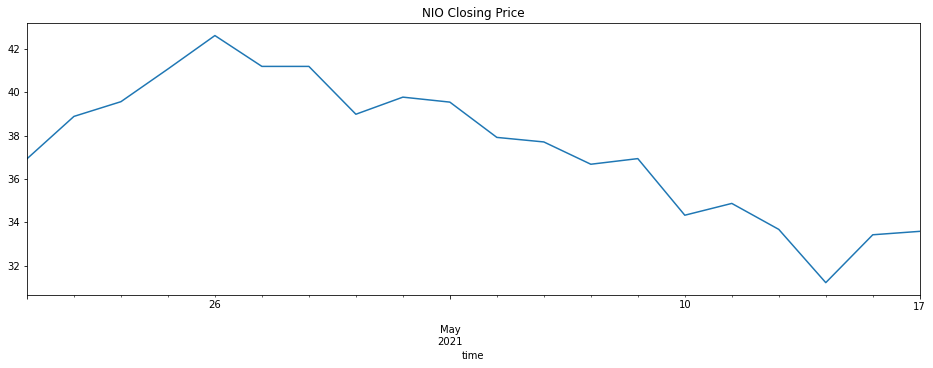

In [21]:
NIO_DATA['NIO','close'].plot(figsize=(16,5), title='NIO Closing Price')

Text(0.5, 1.0, 'NIO')

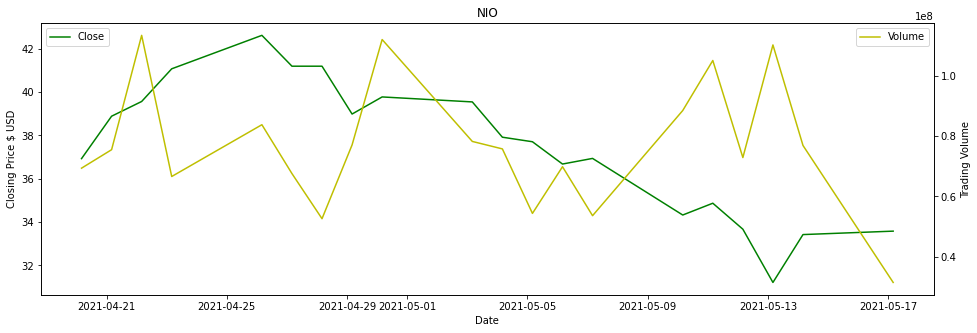

In [22]:
fig, ax = plt.subplots(figsize=(16,5))

l1 = ax.plot(NIO_DATA['NIO', 'close'], 'g-', label='Close')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price $ USD')
ax.legend(loc = 'upper left')

l2 = ax2 = ax.twinx()
ax2.plot(NIO_DATA['NIO', 'volume'], 'y-', label='Volume')
ax2.set_ylabel('Trading Volume')
ax2.legend(loc = 'upper right')

plt.title('NIO')



### Historic Data for Multiple Stock

In [23]:
portfolio_list = ['SPY', 'VNQ', 'BND', 'GLD']

In [24]:
portfolio_data = alpaca.get_barset(portfolio_list, '1D', limit=100).df
portfolio_data

BND                                    \
                              open    high      low   close   volume   
time                                                                   
2020-12-22 00:00:00-05:00  88.1488  88.260  88.0900  88.240  3543012   
2020-12-23 00:00:00-05:00  87.8600  87.870  87.7000  87.870  4261822   
2020-12-24 00:00:00-05:00  87.9900  88.030  87.9312  88.005  1981605   
2020-12-28 00:00:00-05:00  87.9400  88.030  87.8650  87.980  4728889   
2020-12-29 00:00:00-05:00  87.9456  88.045  87.9100  88.020  4910241   
...                            ...     ...      ...     ...      ...   
2021-05-11 00:00:00-04:00  85.0178  85.040  84.9400  84.990  6576072   
2021-05-12 00:00:00-04:00  84.8500  84.850  84.6600  84.680  5538531   
2021-05-13 00:00:00-04:00  84.6800  84.900  84.6800  84.850  6643310   
2021-05-14 00:00:00-04:00  84.9800  85.060  84.9223  85.060  6193905   
2021-05-17 00:00:00-04:00  85.0400  85.040  84.9650  84.995  1108065   

                                GLD                                       \
                               open     high       low   close    volume   
time                                                                       
2020-12-22 00:00:00-05:00  176.2000  176.340  174.3400  174.59   7792459   
2020-12-23 00:00:00-05:00  175.1000  176.210  175.0600  175.67   5710473   
2020-12-24 00:00:00-05:00  175.5500  176.370  175.5145  176.32   3334096   
2020-12-28 00:00:00-05:00  177.2600  177.910  175.6250  175.75   7493794   
2020-12-29 00:00:00-05:00  176.2500  176.970  175.5700  176.33   5643264   
...                             ...      ...       ...     ...       ...   
2021-05-11 00:00:00-04:00  170.5582  172.170  170.2700  172.15   7731643   
2021-05-12 00:00:00-04:00  171.4321  171.835  170.3450  170.43  10761049   
2021-05-13 00:00:00-04:00  170.3500  171.270  170.2250  171.14   7426952   
2021-05-14 00:00:00-04:00  172.0500  172.700  171.8200  172.68   8895363   
2021-05-17 00:00:00-04:00  173.3000  174.680  173.2800  174.44   4629179   

                              SPY                                           \
                             open      high       low     close     volume   
time                                                                         
2020-12-22 00:00:00-05:00  368.21  368.3317  366.0300  367.2200   41116443   
2020-12-23 00:00:00-05:00  368.28  369.6200  367.2172  367.5300   37537811   
2020-12-24 00:00:00-05:00  368.08  369.0100  367.4500  368.9899   21047937   
2020-12-28 00:00:00-05:00  371.74  372.5900  371.0700  372.1400   31589494   
2020-12-29 00:00:00-05:00  373.81  374.0000  370.8300  371.4800   45214280   
...                           ...       ...       ...       ...        ...   
2021-05-11 00:00:00-04:00  413.10  415.2700  410.0600  414.2700  105794428   
2021-05-12 00:00:00-04:00  411.23  412.5900  404.0000  405.4400  117671634   
2021-05-13 00:00:00-04:00  407.07  412.3500  407.0200  410.2600   96561623   
2021-05-14 00:00:00-04:00  413.20  417.4900  413.1800  416.5300   69029028   
2021-05-17 00:00:00-04:00  415.39  416.3900  413.8100  413.8700   21921542   

                             VNQ                                   
                            open    high      low  close   volume  
time                                                               
2020-12-22 00:00:00-05:00  84.50  85.120  84.1100  85.05  2775786  
2020-12-23 00:00:00-05:00  85.37  85.930  84.4150  84.49  3061731  
2020-12-24 00:00:00-05:00  83.48  83.900  83.2300  83.87  1393886  
2020-12-28 00:00:00-05:00  84.29  84.510  83.8000  84.42  5151547  
2020-12-29 00:00:00-05:00  84.69  85.140  83.5700  83.69  3511381  
...                          ...     ...      ...    ...      ...  
2021-05-11 00:00:00-04:00  97.57  97.570  96.3600  97.15  3752927  
2021-05-12 00:00:00-04:00  96.93  97.125  94.6400  94.75  4300359  
2021-05-13 00:00:00-04:00  95.02  96.620  94.9403  95.98  4531046  
2021-05-14 00:00:00-04:00  96.45  97.420  96.310

Text(0.5, 1.0, 'Portfolio List Return')

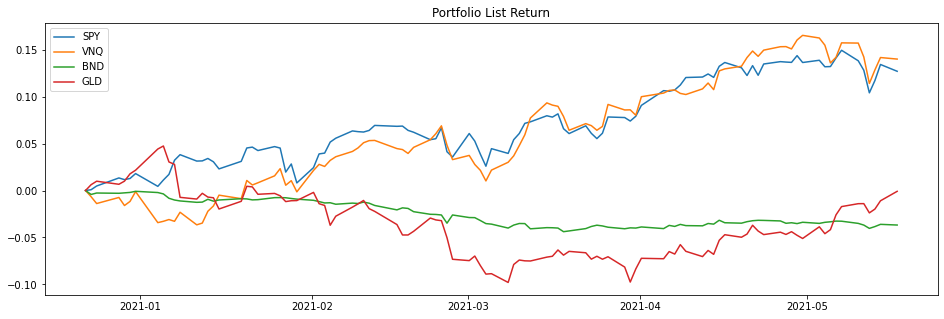

In [25]:
fig = plt.figure(figsize=(16,5))

for i in range(len(portfolio_list)):
    percentage_return = (portfolio_data[portfolio_list[i],'close'] - portfolio_data[portfolio_list[i],'close'][0]) / portfolio_data[portfolio_list[i],'close'][0]
    plt.plot(percentage_return, label=portfolio_list[i])

plt.legend()
plt.title('Portfolio List Return')

## 4) Placing Stock Order

##### Placing a Buy Order at Market Price

In [36]:
order0 = alpaca.submit_order('FB', qty=25, side='buy', type='market')
order0

Order({   'asset_class': 'us_equity',
    'asset_id': 'fc6a5dcd-4a70-4b8d-b64f-d83a6dae9ba4',
    'canceled_at': None,
    'client_order_id': '628615d9-3291-40aa-beab-eb43d2f96e65',
    'created_at': '2021-05-17T15:14:55.680868Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': '90542125-9b24-46f1-9ed7-7a5d611e17f1',
    'legs': None,
    'limit_price': None,
    'notional': None,
    'order_class': '',
    'order_type': 'market',
    'qty': '25',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'buy',
    'status': 'accepted',
    'stop_price': None,
    'submitted_at': '2021-05-17T15:14:55.672743Z',
    'symbol': 'FB',
    'time_in_force': 'day',
    'trail_percent': None,
    'trail_price': None,
    'type': 'market',
    'updated_at': '2021-05-17T15:14:55.680868Z'})

##### Placing a Buy Order at Limit Price

In [47]:
order1 = alpaca.submit_order('NIO', qty=10, side='buy', type='limit', limit_price=28)
order1

Order({   'asset_class': 'us_equity',
    'asset_id': 'c8024b9e-d4cf-4afe-a8d9-2fa2d7ed73ac',
    'canceled_at': None,
    'client_order_id': '245b714e-7a0a-4bd0-9c76-e167b5c8611b',
    'created_at': '2021-05-17T15:17:44.94387Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': '6f049af2-a16a-488b-ae74-e699ab3e0330',
    'legs': None,
    'limit_price': '28',
    'notional': None,
    'order_class': '',
    'order_type': 'limit',
    'qty': '10',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'buy',
    'status': 'accepted',
    'stop_price': None,
    'submitted_at': '2021-05-17T15:17:44.934439Z',
    'symbol': 'NIO',
    'time_in_force': 'day',
    'trail_percent': None,
    'trail_price': None,
    'type': 'limit',
    'updated_at': '2021-05-17T15:17:44.94387Z'})

##### Placing a Sell Order at Market Price

In [44]:
order2 = alpaca.submit_order('FB', qty=10, side='sell', type='market')
order2

Order({   'asset_class': 'us_equity',
    'asset_id': 'fc6a5dcd-4a70-4b8d-b64f-d83a6dae9ba4',
    'canceled_at': None,
    'client_order_id': '5602fc75-6e2f-4835-b8cc-16737cfe32ab',
    'created_at': '2021-05-17T15:16:45.630109Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': '919ea4ce-1828-4aac-b79c-1d2ee5a2ceff',
    'legs': None,
    'limit_price': None,
    'notional': None,
    'order_class': '',
    'order_type': 'market',
    'qty': '10',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'sell',
    'status': 'accepted',
    'stop_price': None,
    'submitted_at': '2021-05-17T15:16:45.628009Z',
    'symbol': 'FB',
    'time_in_force': 'day',
    'trail_percent': None,
    'trail_price': None,
    'type': 'market',
    'updated_at': '2021-05-17T15:16:45.630109Z'})

##### Shorting a Stock

Configure Account to Allow / Disallow Shorting Stock
https://app.alpaca.markets/paper/dashboard/config

In [45]:
alpaca.submit_order('GE', qty=100, side='sell', type='market')

APIError: account is not allowed to short

##### List All Current Orders

In [48]:
order = alpaca.list_orders()
order

[Order({   'asset_class': 'us_equity',
     'asset_id': 'c8024b9e-d4cf-4afe-a8d9-2fa2d7ed73ac',
     'canceled_at': None,
     'client_order_id': '245b714e-7a0a-4bd0-9c76-e167b5c8611b',
     'created_at': '2021-05-17T15:17:44.94387Z',
     'expired_at': None,
     'extended_hours': False,
     'failed_at': None,
     'filled_at': None,
     'filled_avg_price': None,
     'filled_qty': '0',
     'hwm': None,
     'id': '6f049af2-a16a-488b-ae74-e699ab3e0330',
     'legs': None,
     'limit_price': '28',
     'notional': None,
     'order_class': '',
     'order_type': 'limit',
     'qty': '10',
     'replaced_at': None,
     'replaced_by': None,
     'replaces': None,
     'side': 'buy',
     'status': 'new',
     'stop_price': None,
     'submitted_at': '2021-05-17T15:17:44.934439Z',
     'symbol': 'NIO',
     'time_in_force': 'day',
     'trail_percent': None,
     'trail_price': None,
     'type': 'limit',
     'updated_at': '2021-05-17T15:17:44.974665Z'})]

##### Cancel an Order

In [ ]:
alpaca.cancel_order(order[0].id)

In [ ]:
alpaca.list_orders()

##### Cancel All Orders

In [ ]:
alpaca.cancel_all_orders()

In [ ]:
alpaca.list_orders()

##### Check Specific Order Status

In [49]:
alpaca.get_order(order0.id)

Order({   'asset_class': 'us_equity',
    'asset_id': 'fc6a5dcd-4a70-4b8d-b64f-d83a6dae9ba4',
    'canceled_at': None,
    'client_order_id': '628615d9-3291-40aa-beab-eb43d2f96e65',
    'created_at': '2021-05-17T15:14:55.680868Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': '2021-05-17T15:14:55.949137Z',
    'filled_avg_price': '313.59',
    'filled_qty': '25',
    'hwm': None,
    'id': '90542125-9b24-46f1-9ed7-7a5d611e17f1',
    'legs': None,
    'limit_price': None,
    'notional': None,
    'order_class': '',
    'order_type': 'market',
    'qty': '25',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'buy',
    'status': 'filled',
    'stop_price': None,
    'submitted_at': '2021-05-17T15:14:55.672743Z',
    'symbol': 'FB',
    'time_in_force': 'day',
    'trail_percent': None,
    'trail_price': None,
    'type': 'market',
    'updated_at': '2021-05-17T15:14:55.970756Z'})

In [62]:
print(order0.symbol + '\t' + order0.side + '\t' + order0.qty + '\t' + order0.type + '\t' + alpaca.get_order(order0.id).status)

FB	buy	25	market	filled


In [63]:
print(order1.symbol + '\t' + order1.side + '\t' + order1.qty + '\t' + order1.type + '\t' +alpaca.get_order(order1.id).status)

NIO	buy	10	limit	new


In [64]:
print(order2.symbol + '\t' + order2.side + '\t' + order2.qty + '\t' + order1.type + '\t' +alpaca.get_order(order2.id).status)

FB	sell	10	limit	filled


## [PROJECT] Simple Paper Stock Trading Bot

This is a simple trading bot project to practice everything we learned here. THIS IS ONLY MEANT FOR A PRACTICE, DO NOT USE FOR LIVE TRADING! AS ALWAYS, USE AT YOUR OWN RISK! In future tutorials, we will build a back-testing program to test our strategies. But right now, we just want an automatic high frequency trading bot. The strategy is simple, make a trade decision when the short term moving average crosses over the long term moving average. Buy when there is positive momentum and sell when there is negative momentum.

MAKE SURE TO ENABLE SHORT SELLING FOR THIS EXERCISE!

In [284]:
stock = 'GME'
data = alpaca.get_barset(stock, timeframe='1Min', limit=100).df
avg = data[stock,'close'].rolling(30).mean()
avg2 = data[stock,'close'].rolling(15).mean()
diff2 = avg2.diff()

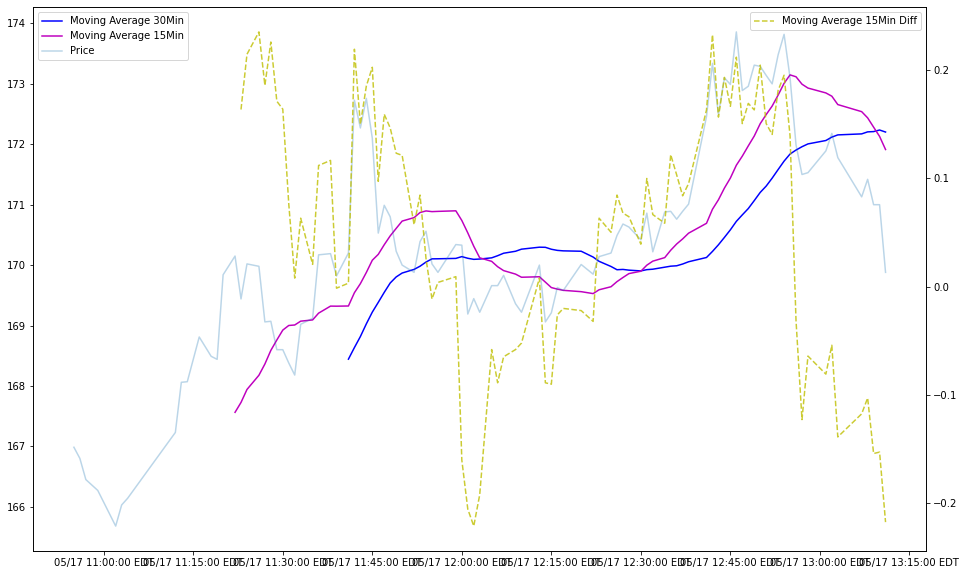

In [285]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(avg, 'b-', label = 'Moving Average 30Min')
ax.plot(avg2, 'm-', label = 'Moving Average 15Min')
ax.plot(data[stock,'close'], label='Price', alpha=0.3)
ax.legend(loc = 'upper left')

ax2 = ax.twinx()
ax2.plot(diff2, 'y--', label = 'Moving Average 15Min Diff', alpha = 0.8)
ax2.legend(loc='upper right')

formatter = mdates.DateFormatter('%m/%d %T %Z', tz=data.index.tz)
plt.gca().xaxis.set_major_formatter(formatter)

In [278]:
# Percentage Change with initial reset when crossed moving average?
# Momentum... buy when cross MA line moving upward, sell when cross MA line moving downward

In [304]:
stock = 'GME'
trade_share = 100
#trigger_threshold = 0.001

MA_Diff0 = 0

while(True):

    print('\n\n')
    
    # Get Market Clock
    clock = alpaca.get_clock()
    timestr = clock.timestamp.strftime('[%m/%d/%y   %H:%M:%S]')

    # Check if Market is Open
    if clock.is_open:
        print(timestr  + ' Market is Open... Executing Trading Bot Sequence!')

        # Get Stock Data
        print(' - [' + stock + '] Retrieving Market Data ...' )
        data = alpaca.get_barset(stock, timeframe='1Min', limit=120).df

        # Analysis Stock Price
        print(' - [' + stock + '] Performing Stock Price Analysis ...' )
        avg30 = data[stock,'close'].rolling(30).mean()
        avg15 = data[stock,'close'].rolling(15).mean()
        diff15 = avg15.diff()    
        MA_Diff = (avg15[-1] - avg30[-1]) / avg30[-1]*100
        price = alpaca.get_last_trade(stock).price        
        print(' --- [{}] Price: {:,.2f}    MA15: {:,.2f}    DIFF15: {:,.2f}     MA30: {:,.2f}     MA_Diff: {:,.2f}'.format(stock, price, avg15[-1], diff15[-1], avg30[-1], MA_Diff) )  

        # Technical Analysis - Buy or Sell Decision
        # Strategy: Trigger when MA15 cross over to MA30... positive momentum - buy ... negative momentum - sell
        print(' - [' + stock + '] Performing Technical Analysis ...' )
        
        if MA_Diff * MA_Diff0 < 0:
            print('--- Trigger Decision Analysis...')

            # Positive Momentum
            if MA_Diff > 0:
                target_share = trade_share
                print('---- LONG: targeted {} shares'.format( target_share ))

            # Negative Momentum
            if MA_Diff < 0:
                target_share = -trade_share
                print('---- SHORT: targeted {} shares'.format(target_share) )


            # Retrieve Account Holdings
            position = alpaca.list_positions()

            stock_holding = 0

            for i in range(len(position)):
                if position[i].symbol == stock:
                    stock_holding = float(position[i].qty)

            print(' ----- [{}] current position: {}'.format(stock, stock_holding))




            # Submit Trade Order if Needed        

            if stock_holding != 0 and stock_holding != target_share:
                order = alpaca.close_position(stock)
                print(' ----- [{}] closing current position ... '.format(stock))

                for i  in range(100):
                    status = alpaca.get_order(order.id).status
                    if status == 'filled':
                        print(' ----- [{}] position closed!'.format(stock))
                        break                 



            if target_share != stock_holding and target_share > 0:

                order = alpaca.submit_order(stock, qty=abs(target_share), side='buy', type='market')
                print(' ----- [{}] BUYING {} shares... '.format(stock, abs(target_share)))

                for i  in range(100):
                    status = alpaca.get_order(order.id).status
                    if status == 'filled':
                        print(' ----- [{}] order excuted!'.format(stock))
                        break    


            if target_share != stock_holding and target_share < 0:

                order = alpaca.submit_order(stock, qty=abs(target_share), side='sell', type='market')
                print(' ----- [{}] SHORT SELLING {} shares... '.format(stock, abs(target_share)))

                for i  in range(100):
                    status = alpaca.get_order(order.id).status
                    if status == 'filled':
                        print(' ----- [{}] order excuted!'.format(stock))
                        break    



        else:
            print('--- Pass Through')
            
            
            
        # Retrieve Account Holdings
            position = alpaca.list_positions()

            stock_holding = 0

            for i in range(len(position)):
                if position[i].symbol == stock:
                    stock_holding = float(position[i].qty)

            print(' - [{}] current position: {}'.format(stock, stock_holding))



        MA_Diff0 = MA_Diff
        
        
        # Close Stock Position Near Ends of Market Hour and EXIT BOT
            
        if clock.timestamp.hour >= 15 and clock.timestamp.minute >= 58:
            print(' - [{}] MARKET CLOSING! CLOSING STOCK POSITION...'.format(stock, stock_holding))

            if stock_holding > 0:
                order = alpaca.close_position(stock)

                for i  in range(100):
                    status = alpaca.get_order(order.id).status
                    if status == 'filled':
                        break
                        
            print(' [{}] Position Closed! Terminating Trade Bot!'.format(stock))


            break
        
    else:
        printt(timestr  + 'Market is currently closed... please come back later!')

        
    # Loop Control
    time.sleep(30)




[05/17/21   15:11:01] Market is Open... Executing Trading Bot Sequence!
 - [GME] Retrieving Market Data ...
 - [GME] Performing Stock Price Analysis ...
 --- [GME] Price: 176.29    MA15: 177.31    DIFF15: -0.02     MA30: 175.76     MA_Diff: 0.89
 - [GME] Performing Technical Analysis ...
--- Pass Through
 - [GME] current position: 0



[05/17/21   15:11:31] Market is Open... Executing Trading Bot Sequence!
 - [GME] Retrieving Market Data ...
 - [GME] Performing Stock Price Analysis ...
 --- [GME] Price: 176.52    MA15: 177.31    DIFF15: -0.02     MA30: 175.76     MA_Diff: 0.89
 - [GME] Performing Technical Analysis ...
--- Pass Through
 - [GME] current position: 0



[05/17/21   15:12:01] Market is Open... Executing Trading Bot Sequence!
 - [GME] Retrieving Market Data ...
 - [GME] Performing Stock Price Analysis ...
 --- [GME] Price: 175.70    MA15: 177.25    DIFF15: -0.06     MA30: 175.87     MA_Diff: 0.78
 - [GME] Performing Technical Analysis ...
--- Pass Through
 - [GME] curren




[05/17/21   15:23:05] Market is Open... Executing Trading Bot Sequence!
 - [GME] Retrieving Market Data ...
 - [GME] Performing Stock Price Analysis ...
 --- [GME] Price: 175.95    MA15: 176.27    DIFF15: -0.06     MA30: 176.70     MA_Diff: -0.24
 - [GME] Performing Technical Analysis ...
--- Pass Through
 - [GME] current position: -100.0



[05/17/21   15:23:35] Market is Open... Executing Trading Bot Sequence!
 - [GME] Retrieving Market Data ...
 - [GME] Performing Stock Price Analysis ...
 --- [GME] Price: 175.95    MA15: 176.27    DIFF15: -0.06     MA30: 176.70     MA_Diff: -0.24
 - [GME] Performing Technical Analysis ...
--- Pass Through
 - [GME] current position: -100.0



[05/17/21   15:24:06] Market is Open... Executing Trading Bot Sequence!
 - [GME] Retrieving Market Data ...
 - [GME] Performing Stock Price Analysis ...
 --- [GME] Price: 175.95    MA15: 176.27    DIFF15: -0.06     MA30: 176.70     MA_Diff: -0.24
 - [GME] Performing Technical Analysis ...
--- Pass Through
 -




[05/17/21   15:35:09] Market is Open... Executing Trading Bot Sequence!
 - [GME] Retrieving Market Data ...
 - [GME] Performing Stock Price Analysis ...
 --- [GME] Price: 177.61    MA15: 177.25    DIFF15: 0.06     MA30: 176.87     MA_Diff: 0.21
 - [GME] Performing Technical Analysis ...
--- Pass Through
 - [GME] current position: 100.0



[05/17/21   15:35:39] Market is Open... Executing Trading Bot Sequence!
 - [GME] Retrieving Market Data ...
 - [GME] Performing Stock Price Analysis ...
 --- [GME] Price: 177.09    MA15: 177.25    DIFF15: 0.06     MA30: 176.87     MA_Diff: 0.21
 - [GME] Performing Technical Analysis ...
--- Pass Through
 - [GME] current position: 100.0



[05/17/21   15:36:09] Market is Open... Executing Trading Bot Sequence!
 - [GME] Retrieving Market Data ...
 - [GME] Performing Stock Price Analysis ...
 --- [GME] Price: 176.88    MA15: 177.25    DIFF15: -0.00     MA30: 176.83     MA_Diff: 0.23
 - [GME] Performing Technical Analysis ...
--- Pass Through
 - [GME] 




[05/17/21   15:47:42] Market is Open... Executing Trading Bot Sequence!
 - [GME] Retrieving Market Data ...
 - [GME] Performing Stock Price Analysis ...
 --- [GME] Price: 179.71    MA15: 177.86    DIFF15: 0.08     MA30: 177.44     MA_Diff: 0.24
 - [GME] Performing Technical Analysis ...
--- Pass Through
 - [GME] current position: 100.0



[05/17/21   15:48:12] Market is Open... Executing Trading Bot Sequence!
 - [GME] Retrieving Market Data ...
 - [GME] Performing Stock Price Analysis ...
 --- [GME] Price: 179.79    MA15: 177.97    DIFF15: 0.11     MA30: 177.54     MA_Diff: 0.24
 - [GME] Performing Technical Analysis ...
--- Pass Through
 - [GME] current position: 100.0



[05/17/21   15:48:42] Market is Open... Executing Trading Bot Sequence!
 - [GME] Retrieving Market Data ...
 - [GME] Performing Stock Price Analysis ...
 --- [GME] Price: 179.50    MA15: 177.97    DIFF15: 0.11     MA30: 177.54     MA_Diff: 0.24
 - [GME] Performing Technical Analysis ...
--- Pass Through
 - [GME] c